# Study of Adult Income Data Set
https://archive.ics.uci.edu/ml/datasets/Adult

Labels imbalance makes accuracy score not appropriate. ROC AUC or F1 is better suited. In the following F1 is used

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import pandas as pd
data=pd.read_csv('adult_all.csv', sep=', ', engine='python',
                 names=['age','workclass','fnlwgt','education','education-num','marital-status',
                        'occupation','relationship','race','sex','capital-gain','capital-loss',
                        'hours-per-week','native-country','income'])
data[:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print(data.shape)

(48842, 15)


### Finding / removing unknown data

In [4]:
np.unique(data['workclass'])

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object)

In [5]:
(data['workclass'].values=='?').sum()

2799

In [6]:
np.unique(data['education'])

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'], dtype=object)

In [7]:
np.unique(data['education-num'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16], dtype=int64)

In [8]:
np.unique(data['marital-status'])

array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'], dtype=object)

In [9]:
np.unique(data['occupation'])

array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving'], dtype=object)

In [10]:
(data['occupation'].values=='?').sum()

2809

In [11]:
np.unique(data['relationship'])

array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife'], dtype=object)

In [12]:
np.unique(data['race'])

array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
       'White'], dtype=object)

In [13]:
np.unique(data['sex'])

array(['Female', 'Male'], dtype=object)

In [14]:
np.unique(data['native-country'])

array(['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France',
       'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands',
       'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
       'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan',
       'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia'], dtype=object)

In [15]:
(data['native-country'].values=='?').sum()

857

## Normalize class labels

In [16]:
np.unique(data['income'])

array(['<=50K', '<=50K.', '>50K', '>50K.'], dtype=object)

In [17]:
data.loc[data['income']=='<=50K.','income']='<=50K'
data.loc[data['income']=='>50K.','income']='>50K'
np.unique(data['income'])

array(['<=50K', '>50K'], dtype=object)

#### Keep label (0/1) in income column

In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(data['income'].values)
data['income'] = y

### Labels Ratio

In [410]:
print('labels 0: %d' % np.sum(y==0))
print('labels 1: %d' % np.sum(y==1))
print('labels 0 ratio over total: %.3f' % (float(np.sum(y==0)) / (np.sum(y==0) + np.sum(y==1))))

labels 0: 37155
labels 1: 11687
labels 0 ratio over total: 0.761


## ==> Labels are not balanced: accuracy score is not an appropriate measure. Use F1 (or ROC AUC). F1 is used in the following
Accuracy is not really useful since a model predicting always 0 would have a 76.1% accuracy

## Encode Categorical Variables

In [19]:
def printResults(y_test,y_pred,y_train=None,y_train_pred=None):
    from sklearn.metrics import confusion_matrix,precision_score,recall_score, f1_score

    if y_train is not None and y_train_pred is not None:
        print('==== Training set ====')
        print(confusion_matrix(y_true=y_train, y_pred=y_train_pred))
        print('Precision: %.3f' % precision_score(y_true=y_train, y_pred=y_train_pred))
        print('Recall: %.3f' % recall_score(y_true=y_train, y_pred=y_train_pred))
        print('F1 train: %.3f' % f1_score(y_true=y_train, y_pred=y_train_pred))
        print('')
    print('==== Test set ====')
    print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
    print('F1 test: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
    
def encodeNominalVariablesWithGetDummies(data):
    # this also removes the rows containing NAs
    cleaned_data=(data[(data['workclass']!='?') & (data['occupation']!='?') & (data['native-country']!='?')])
    print('keeping %.2f%% of the data after removing rows containing unknown data'
          % (float(len(cleaned_data)/float(len(data))*100)))
    data=cleaned_data
    y = cleaned_data['income']
    # drop label column
    data=data.iloc[:,:-1]
    # encode
    data = pd.get_dummies(data)
    X=data.values
    return X,y

def encodeNominalVariablesIntoOnesAndZeros(data):
    y = data['income']
    # drop label column
    data=data.iloc[:,:-1]

    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder
    # init empty array: columns will be concatenated to it
    X=np.ndarray(shape=[len(data),0],dtype=np.dtype(np.int64))
    new_columns=[]
    for column,dtype in zip(data.columns, data.dtypes):
        if dtype is np.dtype(np.object):
            #print('column %s is object' % column)
            columnToEncode=data.loc[:,[column]].values[:,0]
            #print('columnToEncode: %s' % columnToEncode)
            encoder = LabelEncoder()
            encodedColumn = encoder.fit_transform(columnToEncode)
            encodedColumn = encodedColumn.reshape(len(encodedColumn),-1)
            #print('encodedColumn: %s' % str(encodedColumn))
            ohe = OneHotEncoder(categorical_features=[0])
            explodedColumn = ohe.fit_transform(encodedColumn).toarray()
            for feature in ohe.active_features_:
                decoded_value = encoder.inverse_transform(feature)
                if (decoded_value != '?'):
                    new_columns.append(column + '_' + decoded_value)
            
            if '?' in np.unique(data[column]):
                #print('? in values of column %s' % column)
                naIndex = encoder.transform('?')
                #print('encodedNA: %d' % naIndex)
                # append to X all exploded columns except the NA column
                X=np.concatenate((X, explodedColumn[:,0:naIndex],explodedColumn[:,naIndex+1:]), axis=1)
            else:
                #print('? NOT in values of column %s' % column)
                # append to X all exploded columns
                X=np.concatenate((X, explodedColumn), axis=1)

        else:
            #print('column %s is NOT object' % column)
            X=np.concatenate((X, data.loc[:,[column]].values), axis=1)
            new_columns.append(column)

    return X,y,new_columns

def testEncodeNominalVariablesIntoOnesAndZeros():
    d = {'col1': [1,2,3,4], 'col2': ['a','a','?','b'],'income': [1,0,0,1] }
    df = pd.DataFrame(data=d)
    print(df)
    dfX,dfy,new_columns=encodeNominalVariablesIntoOnesAndZeros(df)
    print(dfX)
    print('new columns: %s' % new_columns)

#testEncodeNominalVariablesIntoOnesAndZeros()

In [20]:
#X,y = encodeNominalVariablesWithGetDummies(data)
X,y,columns = encodeNominalVariablesIntoOnesAndZeros(data)
print('X.shape: %s' % str(X.shape))
columns=np.array(columns)
X

X.shape: (48842L, 105L)


array([[ 39.,   0.,   0., ...,   1.,   0.,   0.],
       [ 50.,   0.,   0., ...,   1.,   0.,   0.],
       [ 38.,   0.,   0., ...,   1.,   0.,   0.],
       ..., 
       [ 38.,   0.,   0., ...,   1.,   0.,   0.],
       [ 44.,   0.,   0., ...,   1.,   0.,   0.],
       [ 35.,   0.,   0., ...,   1.,   0.,   0.]])

In [21]:
encoded_data=pd.DataFrame(X, columns=columns)
encoded_data[:5]

,age,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,fnlwgt,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,0,0,0,0,0,0,1,0,77516,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,0,0,0,1,0,0,83311,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,0,1,0,0,0,0,215646,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,0,1,0,0,0,0,234721,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,0,1,0,0,0,0,338409,...,0,0,0,0,0,0,0,0,0,0


## Utility Functions

In [51]:
X_orig=X.copy()
y_orig=y.copy()
columns_orig=list(columns)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# keep copies of non standardized data as some models use them
X_train_orig=X_train.copy()
y_train_orig=y_train.copy()
X_test_orig=X_test.copy()
y_test_orig=y_test.copy()

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# keep copies of standardized data
X_train_std_orig=X_train_std.copy()
X_test_std_orig=X_test_std.copy()
y_train_orig=y_train.copy()
y_test_orig=y_test.copy()

def getDataSetStdCopy():
    X_train_std=X_train_std_orig.copy()
    X_test_std=X_test_std_orig.copy()
    y_train=y_train_orig.copy()
    y_test=y_test_orig.copy()
    columns=list(columns_orig) 
    return X_train_std, X_test_std, y_train, y_test, columns

def getDataSetCopy():
    X_train=X_train_orig.copy()
    X_test=X_test_orig.copy()
    y_train=y_train_orig.copy()
    y_test=y_test_orig.copy()
    columns=list(columns_orig)
    return X_train, X_test, y_train, y_test, columns

# function to test f1 score with for a set of columns
def scoreWithColumns(estimator, X_train_std, X_test_std, y_train, y_test, columns, new_columns):

    dfX_train_std=pd.DataFrame(X_train_std, columns=columns)
    X_train_std=dfX_train_std.loc[:,new_columns].values

    dfX_test_std=pd.DataFrame(X_test_std, columns=columns)
    X_test_std=dfX_test_std.loc[:,new_columns].values

    lr = LogisticRegression(C=1000.0, random_state=0)
    lr.fit(X_train_std, y_train)
    y_train_pred = lr.predict(X_train_std)
    y_test_pred = lr.predict(X_test_std)

    printResults(y_test,y_test_pred, y_train=y_train, y_train_pred=y_train_pred)

## Feature Selection

### Univariate Feature Selection (chi2, f_classif)
This selects features independently from each other, with a metric. E.g. chi2 can measure the independence between a feature and the label. See https://en.wikipedia.org/wiki/Chi-squared_test#Example_chi-squared_test_for_categorical_data. When the stat is computed (sum over all cells (for classification we have a 2x2 matrix hence degree of freedom =1)), we get the pvalue with the chi2 distribution: if the p-value is low, the independence hypothesis is rejected. Overall we sort the feature per p-value and keep the k ones with the lowest pvalues (sklearn.feature_selection.chi2 automates that)

In [69]:
def selectFeaturesWithScore(estimator, X, y, columns, selector_name, selector, max_columns=6):
    from sklearn.feature_selection import SelectKBest
    col_indices=[]
    retained_columns=[]
    score_means=[]
    score_stds=[]
    columns=np.array(columns)
    
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline

    pipe = Pipeline([('scl', StandardScaler()),
                     ('clf', estimator)])
    
    for k in range(2,max_columns+1):
        col_indices.append(k)
        best=SelectKBest(selector, k=k)
        X_new = best.fit_transform(X, y)
        support= best.get_support()
        
        from sklearn.cross_validation import cross_val_score
        scores = cross_val_score(estimator=pipe, X=X_new, y=y, 
                                 cv=10, scoring='f1', n_jobs=1)

        score_means.append(np.mean(scores))
        score_stds.append(np.std(scores))
        retained_columns.append(list(columns[support]))
        print('selector: %s, cols: %d: mean: %.4f, std: %.4f, cols: %s' % \
              (selector_name, k, np.mean(scores), np.std(scores), str(sorted(columns[support]))))

    return col_indices, retained_columns, np.array(score_means), np.array(score_stds)

In [93]:
def plotScoresForGrowingSelectedFeatures(estimator, X, y, columns, featureSelectors, max_columns):

    selector_results=[]
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']

    for idx, (selector_name,selector) in enumerate(featureSelectors):
        col_indices, retained_columns,score_means,score_stds = \
                selectFeaturesWithScore(estimator, X, y, columns, selector_name, selector, max_columns)
    

        plt.plot(col_indices, score_means, color=colors[idx], marker='o', 
                 markersize=5, label='f1 %s' % selector_name)

        plt.fill_between(col_indices, 
                         score_means + score_stds,
                         score_means - score_stds, 
                         alpha=0.15, color=colors[idx])
    plt.grid()
    plt.xlabel('Number of columns')
    plt.ylabel('f1')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    return dict([(colNumber,retained_columns[idx]) for idx,colNumber in enumerate(col_indices)])

selector: chi2, cols: 2: mean: 0.4119, std: 0.0242, cols: ['capital-gain', 'capital-loss']
selector: chi2, cols: 3: mean: 0.4124, std: 0.0217, cols: ['capital-gain', 'capital-loss', 'fnlwgt']
selector: chi2, cols: 4: mean: 0.3860, std: 0.0248, cols: ['age', 'capital-gain', 'capital-loss', 'fnlwgt']
selector: chi2, cols: 5: mean: 0.4037, std: 0.0209, cols: ['age', 'capital-gain', 'capital-loss', 'fnlwgt', 'hours-per-week']
selector: chi2, cols: 6: mean: 0.4677, std: 0.0168, cols: ['age', 'capital-gain', 'capital-loss', 'fnlwgt', 'hours-per-week', 'marital-status_Married-civ-spouse']
selector: chi2, cols: 7: mean: 0.4674, std: 0.0177, cols: ['age', 'capital-gain', 'capital-loss', 'fnlwgt', 'hours-per-week', 'marital-status_Married-civ-spouse', 'relationship_Husband']
selector: chi2, cols: 8: mean: 0.6290, std: 0.0193, cols: ['age', 'capital-gain', 'capital-loss', 'education-num', 'fnlwgt', 'hours-per-week', 'marital-status_Married-civ-spouse', 'relationship_Husband']
selector: chi2, cols

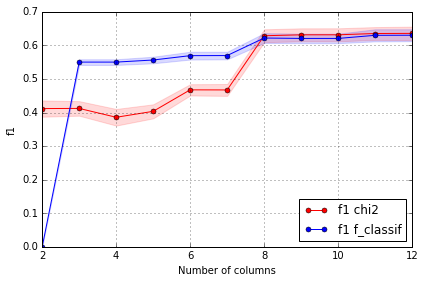

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

selectors=[('chi2',chi2),('f_classif',f_classif)]

X_train, X_test, y_train, y_test, columns = getDataSetCopy()

columnsForNumberOfColumns = plotScoresForGrowingSelectedFeatures(lr, X_train, y_train, columns, selectors, 12)

In [95]:
print('score with 8 columns: %s' % str(columnsForNumberOfColumns[8]))
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)

X_train_std, X_test_std, y_train, y_test, columns = getDataSetStdCopy()

scoreWithColumns(lr, X_train_std, X_test_std, y_train, y_test, columns, 
                 ['education-num', 'occupation_Exec-managerial', 'relationship_Not-in-family', 
                  'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 
                  'capital-gain', 'capital-loss'])

score with 8 columns: ['age', 'education-num', 'marital-status_Married-civ-spouse', 'marital-status_Never-married', 'relationship_Husband', 'relationship_Own-child', 'capital-gain', 'hours-per-week']
==== Training set ====
[[25750  2113]
 [ 3621  5147]]
Precision: 0.709
Recall: 0.587
F1 train: 0.642

==== Test set ====
[[8573  719]
 [1156 1763]]
Precision: 0.710
Recall: 0.604
F1 test: 0.653


### Sequential Backward Selection
On each iteration eliminate the feature that causes the least performance loss after removal

In [251]:
def allButOneCombinations(indices):
    arr=np.array(range(len(indices)))
    indices_arr=np.array(indices)
    return [indices_arr[arr[arr!=i]] for i in arr]
#allButOneCombinations([0,3,4,6,7])

class SBS():
    """
    keep_feature_fraction_per_iteration must be a number between 0 and 1. If 0.8, 20% of
    the features will be removed at each iteration. (cumulative: at iteration #2, it'll
    be 20% of the 80% remaining...etc... until we remove a minimum of 1 feature per iteration)
    """
    def __init__(self, estimator, k_features, features, 
                 keep_feature_fraction_per_iteration=0.1,
        test_size=0.25, random_state=1):
        
        from sklearn.metrics import f1_score
        from sklearn.base import clone
        self.scoring = f1_score
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.keep_feature_fraction_per_iteration = keep_feature_fraction_per_iteration
        self.features = np.array(features)
        self.feature_sets = {}

        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        from sklearn.cross_validation import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        dim = X_train.shape[1]
        self.remaining_indices=np.array(range(dim))
        score = self._calc_score(X_train, y_train, X_test, y_test, self.remaining_indices)
        self.subsets_ = [self.remaining_indices]
        self.scores_ = [score]
        # print('remaining_indices: %s' % self.remaining_indices )

        while dim > self.k_features:
            scores = []
            
            for indices in allButOneCombinations(self.remaining_indices):
                # compute score when removing feature 'feature'
                score = self._calc_score(X_train, y_train, X_test, y_test, indices)
                scores.append(score)
                # print('score %.6f for indices %s' % (score,indices))

            sorted_scores=sorted(scores)
            # determine the number of features to remove
            if self.keep_feature_fraction_per_iteration is None:
                cntToRemove=1
                min_score=max(sorted_scores) # remove only the max score
            else:
                # retain all features except the ones that yielded the best score when they were removed
                # and remove a max of cntToRemove features (to account for equal scores)
                best_scores=sorted_scores[(min(-1,-int(len(sorted_scores) * (1-self.keep_feature_fraction_per_iteration)))) :]
                # print('retaining the best %d scores' % len(best_scores))
                min_score = min(best_scores)
                cntToRemove=len(best_scores)

            from collections import defaultdict
            scoresToRemove=defaultdict(lambda:0)
            for i,score in enumerate(reversed(sorted_scores)):
                if (i == cntToRemove):
                    break
                if score >= min_score:
                    scoresToRemove[score] = scoresToRemove[score]+1
            # print('scoresToRemove: %s' % (str(scoresToRemove)))
            indices_to_keep=[]
            for i,indice in enumerate(self.remaining_indices):
                if scores[i] in scoresToRemove and scoresToRemove[scores[i]] > 0:
                    scoresToRemove[scores[i]] = scoresToRemove[scores[i]] - 1
                    # print('i: %d, removing score: %.6f, removing index: %d' % (i,scores[i],self.remaining_indices[i]))
                else:
                    # print('i: %d, score: %.6f, keep index: %d' % (i,scores[i],self.remaining_indices[i]))
                    indices_to_keep.append(self.remaining_indices[i])
            # print('indices_to_keep: %s' % str(indices_to_keep))
            
            self.remaining_indices = indices_to_keep
            
            self.subsets_.append(self.remaining_indices)
            self.scores_.append(min_score)
            # print('features: %s' % self.features)
            # print('self.remaining_indices: %s' % self.remaining_indices)

            dim -= cntToRemove
            
            print('number of features: %d : score: %.6f' % (dim,min_score))
            # uncomment for additional details
            # print('number of features: %d : score: %.6f, %s' % (dim,min_score,str( self.features[self.remaining_indices])))

        self.k_score_ = self.scores_[-1]

        # dictionary: number of features => feature set
        from collections import OrderedDict
        feature_sets = [ (sbs.features[subset], len(subset)) for subset in sbs.subsets_]
        self.feature_sets = { i:feature_set for feature_set,i in feature_sets }

        return self

    def transform(self, X):
        return X[:, self.remaining_indices]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [252]:
X_train_std, X_test_std, y_train, y_test, columns = getDataSetStdCopy()

# uncomment below to start from a subset of columns

#dfX_train_std=pd.DataFrame(X_train_std, columns=columns)
#dfX_test_std=pd.DataFrame(X_test_std, columns=columns)
#columns=['age', 'capital-gain', 'capital-loss', 'education-num', 'fnlwgt', 'hours-per-week', 
#         'marital-status_Married-civ-spouse', 'marital-status_Never-married', 
#         'occupation_Exec-managerial', 'occupation_Prof-specialty', 'relationship_Husband', 
#         'relationship_Own-child']
#X_train_std=dfX_train_std.loc[:,columns].values
#X_test_std=dfX_test_std.loc[:,columns].values

In [253]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=0)
sbs = SBS(lr, k_features=2,features=columns, keep_feature_fraction_per_iteration=None)
sbs.fit(X_train_std, y_train)

number of features: 104 : score: 0.664967
number of features: 103 : score: 0.665817
number of features: 102 : score: 0.665987
number of features: 101 : score: 0.666497
number of features: 100 : score: 0.667006
number of features: 99 : score: 0.667176
number of features: 98 : score: 0.667176
number of features: 97 : score: 0.667176
number of features: 96 : score: 0.667176
number of features: 95 : score: 0.667176
number of features: 94 : score: 0.667516
number of features: 93 : score: 0.667855
number of features: 92 : score: 0.668017
number of features: 91 : score: 0.669369
number of features: 90 : score: 0.670215
number of features: 89 : score: 0.670385
number of features: 88 : score: 0.670555
number of features: 87 : score: 0.670558
number of features: 86 : score: 0.670886
number of features: 85 : score: 0.670886
number of features: 84 : score: 0.670886
number of features: 83 : score: 0.670886
number of features: 82 : score: 0.670886
number of features: 81 : score: 0.670886
number of f

<__main__.SBS instance at 0x000000001A68E748>

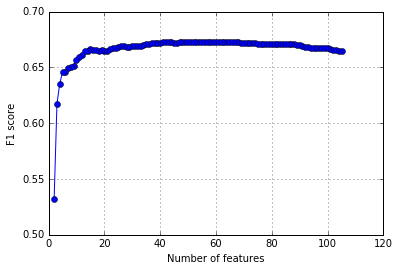

In [256]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 0.7])
plt.ylabel('F1 score')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [258]:
sorted(sbs.feature_sets[8])

['age',
 'capital-gain',
 'capital-loss',
 'education-num',
 'hours-per-week',
 'marital-status_Married-civ-spouse',
 'occupation_Exec-managerial',
 'workclass_Self-emp-not-inc']

In [259]:
# retrain on train set and verify score on test set
X_train_std, X_test_std, y_train, y_test, columns = getDataSetStdCopy()
print('score for 8 columns: %s\n' % str(sbs.feature_sets[8]))
scoreWithColumns(lr, X_train_std, X_test_std, y_train, y_test, columns, sbs.feature_sets[8])

score for 8 columns: ['age' 'workclass_Self-emp-not-inc' 'education-num'
 'marital-status_Married-civ-spouse' 'occupation_Exec-managerial'
 'capital-gain' 'capital-loss' 'hours-per-week']

==== Training set ====
[[25998  1865]
 [ 3776  4992]]
Precision: 0.728
Recall: 0.569
F1 train: 0.639

==== Test set ====
[[8657  635]
 [1219 1700]]
Precision: 0.728
Recall: 0.582
F1 test: 0.647


In [168]:
# retrain on train set and verify score on test set
X_train_std, X_test_std, y_train, y_test, columns = getDataSetStdCopy()
print('score for 8 columns: %s\n' % str(sbs.feature_sets[8]))
scoreWithColumns(lr, X_train_std, X_test_std, y_train, y_test, columns, sbs.feature_sets[8])

score for 8 columns: ['age' 'capital-gain' 'capital-loss' 'education-num' 'hours-per-week'
 'marital-status_Married-civ-spouse' 'occupation_Exec-managerial'
 'occupation_Prof-specialty']

==== Training set ====
[[25989  1874]
 [ 3793  4975]]
Precision: 0.726
Recall: 0.567
F1 train: 0.637

==== Test set ====
[[8667  625]
 [1234 1685]]
Precision: 0.729
Recall: 0.577
F1 test: 0.644


## Recursive Feature Elimination
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached

In [274]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X_train_std, X_test_std, y_train, y_test, columns = getDataSetStdCopy()

# uncomment below to start from a subset of columns

#dfX_train_std=pd.DataFrame(X_train_std, columns=columns)
#dfX_test_std=pd.DataFrame(X_test_std, columns=columns)
#columns=['age', 'capital-gain', 'capital-loss', 'education-num', 'fnlwgt', 'hours-per-week', 
#         'marital-status_Married-civ-spouse', 'marital-status_Never-married', 
#         'occupation_Exec-managerial', 'occupation_Prof-specialty', 'relationship_Husband', 
#         'relationship_Own-child']
#X_train_std=dfX_train_std.loc[:,columns].values
#X_test_std=dfX_test_std.loc[:,columns].values

lr = LogisticRegression(C=100.0, random_state=0)
selector = RFE(lr, n_features_to_select=8, step=0.1)
selector = selector.fit(X_train_std, y_train)

#### the 8 retained features (removing 10% of the features at each iteration)

In [285]:
sorted(np.array(columns)[selector.support_])

['capital-gain',
 'education-num',
 'hours-per-week',
 'marital-status_Divorced',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'relationship_Own-child']

#### the 20 most important features

In [284]:
sorted(zip(selector.ranking_,columns))[:20]

[(1, 'capital-gain'),
 (1, 'education-num'),
 (1, 'hours-per-week'),
 (1, 'marital-status_Divorced'),
 (1, 'marital-status_Never-married'),
 (1, 'marital-status_Separated'),
 (1, 'marital-status_Widowed'),
 (1, 'relationship_Own-child'),
 (2, 'age'),
 (2, 'capital-loss'),
 (2, 'marital-status_Married-spouse-absent'),
 (2, 'occupation_Exec-managerial'),
 (2, 'occupation_Farming-fishing'),
 (2, 'occupation_Other-service'),
 (2, 'relationship_Husband'),
 (3, 'native-country_Mexico'),
 (3, 'occupation_Handlers-cleaners'),
 (3, 'occupation_Priv-house-serv'),
 (3, 'occupation_Prof-specialty'),
 (3, 'relationship_Other-relative')]

#### retrain on train set and verify score on test set

In [286]:
print('score for 8 columns: %s\n' % str(np.array(columns)[selector.support_]))
scoreWithColumns(lr, X_train_std, X_test_std, y_train, y_test, columns, np.array(columns)[selector.support_])

score for 8 columns: ['education-num' 'marital-status_Divorced' 'marital-status_Never-married'
 'marital-status_Separated' 'marital-status_Widowed'
 'relationship_Own-child' 'capital-gain' 'hours-per-week']

==== Training set ====
[[25814  2049]
 [ 3976  4792]]
Precision: 0.700
Recall: 0.547
F1 train: 0.614

==== Test set ====
[[8606  686]
 [1296 1623]]
Precision: 0.703
Recall: 0.556
F1 test: 0.621


### Same but removing only 1 feature per iteration (step = 1) (same result)

In [287]:
lr = LogisticRegression(C=100.0, random_state=0)
selector = RFE(lr, n_features_to_select=8, step=1)
selector = selector.fit(X_train_std, y_train)

#### the 8 retained features (removing 1 feature at each iteration)

In [340]:
sorted(np.array(columns)[selector.support_])

['capital-gain',
 'education-num',
 'hours-per-week',
 'marital-status_Divorced',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'relationship_Own-child']

#### the 20 most important features

In [353]:
# infer an importance from the rank (use the inverse)
importances=np.array([1.0/r for r in selector.ranking_])
indices=np.argsort(importances)[::-1]
for f in range(20):
    print("%2d) %-*s %f" % (f + 1, 36, 
                            columns[indices[f]], 
                            importances[indices[f]]))

 1) hours-per-week                       1.000000
 2) marital-status_Never-married         1.000000
 3) capital-gain                         1.000000
 4) relationship_Own-child               1.000000
 5) marital-status_Widowed               1.000000
 6) marital-status_Separated             1.000000
 7) education-num                        1.000000
 8) marital-status_Divorced              1.000000
 9) occupation_Other-service             0.500000
10) age                                  0.333333
11) marital-status_Married-spouse-absent 0.250000
12) relationship_Husband                 0.200000
13) sex_Male                             0.166667
14) occupation_Farming-fishing           0.142857
15) capital-loss                         0.125000
16) relationship_Other-relative          0.111111
17) occupation_Exec-managerial           0.100000
18) occupation_Priv-house-serv           0.090909
19) sex_Female                           0.083333
20) occupation_Handlers-cleaners         0.076923


#### retrain on train set and verify score on test set for the 8 columns

In [290]:
print('score for 8 columns: %s\n' % str(np.array(columns)[selector.support_]))
scoreWithColumns(lr, X_train_std, X_test_std, y_train, y_test, columns, np.array(columns)[selector.support_])

score for 8 columns: ['education-num' 'marital-status_Divorced' 'marital-status_Never-married'
 'marital-status_Separated' 'marital-status_Widowed'
 'relationship_Own-child' 'capital-gain' 'hours-per-week']

==== Training set ====
[[25814  2049]
 [ 3976  4792]]
Precision: 0.700
Recall: 0.547
F1 train: 0.614

==== Test set ====
[[8606  686]
 [1296 1623]]
Precision: 0.703
Recall: 0.556
F1 test: 0.621


## Feature Selection with L1 regularization
L1 favors sparse results (the larger the regularization parameter, the more coefficients are 0). Coefficients = 0 is equivalent to feature elimination. We can increase the regularization parameter until we have the desired number of features (the ones with non 0 coefficient)

In [222]:
def selectFeaturesWithL1LogReg(X, y, columns, reg_params):
    from sklearn.linear_model import LogisticRegression
    from sklearn.cross_validation import train_test_split
    from sklearn.metrics import f1_score

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    dic={}
    for reg_param in reg_params:
        lr = LogisticRegression(C=reg_param, penalty='l1', random_state=0)
        lr.fit(X_train, y_train)

        y_test_pred = lr.predict(X_test)
        score = f1_score(y_true=y_test, y_pred=y_test_pred)
        
        features_nb = sum(lr.coef_[0]!=0)
        print('reg: %.6f, features: %d, f1 score: %.4f' % (reg_param, features_nb, score))
        features=(np.array(columns))[lr.coef_[0]!=0]
        dic[features_nb] = (features,score)

    from collections import OrderedDict
    return OrderedDict(sorted(dic.items()))

In [223]:
X_train_std, X_test_std, y_train, y_test, columns = getDataSetStdCopy()

selected_features = selectFeaturesWithL1LogReg(X_train_std, y_train, columns,
                                              [1,0.1,0.05,0.01,0.005,0.003,0.002,0.001,0.0005])

reg: 1.000000, features: 96, f1 score: 0.6600
reg: 0.100000, features: 84, f1 score: 0.6590
reg: 0.050000, features: 75, f1 score: 0.6554
reg: 0.010000, features: 41, f1 score: 0.6471
reg: 0.005000, features: 24, f1 score: 0.6319
reg: 0.003000, features: 15, f1 score: 0.6214
reg: 0.002000, features: 10, f1 score: 0.6018
reg: 0.001000, features: 7, f1 score: 0.5535
reg: 0.000500, features: 3, f1 score: 0.5152


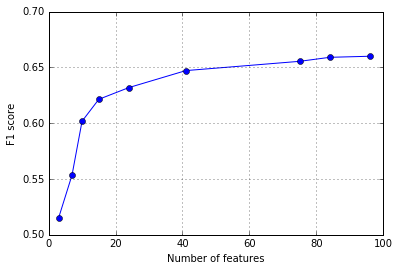

In [236]:
feature_nbs = [nb for nb,_ in selected_features.items()]
scores = [score for nb,(feat,score) in selected_features.items()]
plt.plot(feature_nbs, scores, marker='o')
plt.ylim([0.5, 0.7])
plt.ylabel('F1 score')
plt.xlabel('Number of features')
plt.grid()
plt.show()

#### the above is only used to select features
### retrain on train set and verify score on test set with L2 regularization (score will be different)

In [241]:
# retrain on train set and verify score on test set
print('score for 15 columns: %s\n' % str(selected_features[15]))
scoreWithColumns(lr, X_train_std, X_test_std, y_train, y_test, columns, selected_features[15][0])

score for 15 columns: (array(['age', 'workclass_Federal-gov', 'workclass_Self-emp-not-inc',
       'education-num', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Other-service',
       'occupation_Prof-specialty', 'occupation_Tech-support',
       'relationship_Own-child', 'capital-gain', 'capital-loss',
       'hours-per-week'], 
      dtype='|S41'), 0.62140992167101838)

==== Training set ====
[[26002  1861]
 [ 3658  5110]]
Precision: 0.733
Recall: 0.583
F1 train: 0.649

==== Test set ====
[[8674  618]
 [1178 1741]]
Precision: 0.738
Recall: 0.596
F1 test: 0.660


## Feature Selection with Random Forests
Remove the less important features. Importance is measured with the impurity decrease.

In [ ]:
X_train, X_test, y_train, y_test, columns = getDataSetCopy()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,
                               random_state=0,
                               n_jobs=-1)
forest.fit(X_train, y_train)

In [304]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1])[:20]:
    print("%2d) %-*s %f" % (f + 1, 30, 
                            columns[indices[f]], 
                            importances[indices[f]]))

 1) fnlwgt                         0.166864
 2) age                            0.151366
 3) capital-gain                   0.096578
 4) hours-per-week                 0.085391
 5) marital-status_Married-civ-spouse 0.062672
 6) education-num                  0.058073
 7) relationship_Husband           0.047349
 8) capital-loss                   0.029648
 9) marital-status_Never-married   0.023815
10) occupation_Exec-managerial     0.018822
11) occupation_Prof-specialty      0.015750
12) education_Bachelors            0.011860
13) workclass_Private              0.010885
14) relationship_Not-in-family     0.010714
15) relationship_Wife              0.009301
16) sex_Female                     0.009167
17) sex_Male                       0.008996
18) relationship_Own-child         0.008425
19) workclass_Self-emp-not-inc     0.008311
20) education_Masters              0.007792


#### retrain on train set and verify score on test set for the 15 most important features

In [316]:
# retrain on train set and verify score on test set
selected_features=list(np.array(columns)[indices][:15])
print('score for 15 columns: %s\n' % str(selected_features))
scoreWithColumns(lr, X_train_std, X_test_std, y_train, y_test, columns, selected_features)

score for 15 columns: ['fnlwgt', 'age', 'capital-gain', 'hours-per-week', 'marital-status_Married-civ-spouse', 'education-num', 'relationship_Husband', 'capital-loss', 'marital-status_Never-married', 'occupation_Exec-managerial', 'occupation_Prof-specialty', 'education_Bachelors', 'workclass_Private', 'relationship_Not-in-family', 'relationship_Wife']

==== Training set ====
[[26018  1845]
 [ 3782  4986]]
Precision: 0.730
Recall: 0.569
F1 train: 0.639

==== Test set ====
[[8662  630]
 [1231 1688]]
Precision: 0.728
Recall: 0.578
F1 test: 0.645


## Learning Curve : do we need more samples ?

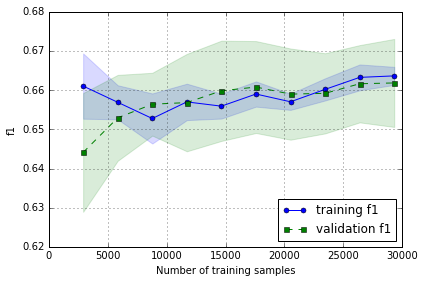

In [220]:
X_train, X_test, y_train, y_test, columns = getDataSetCopy()

from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=0))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=5, scoring='f1',
                n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training f1')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation f1')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('f1')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### Score increases with samples. No overfitting from 7500 samples

## Validation Curve: find the best L2 regularization parameter for logistic regression

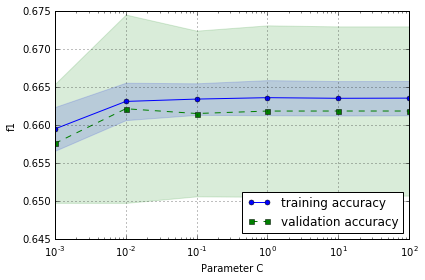

In [221]:
from sklearn.learning_curve import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                scoring='f1',
                cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training F1')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation F1')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('f1')
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

#### Use C=100 (inverse of regularization)

## Use PCA to find most significant features

In [371]:
X_train_std, X_test_std, y_train, y_test, columns = getDataSetStdCopy()

from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)


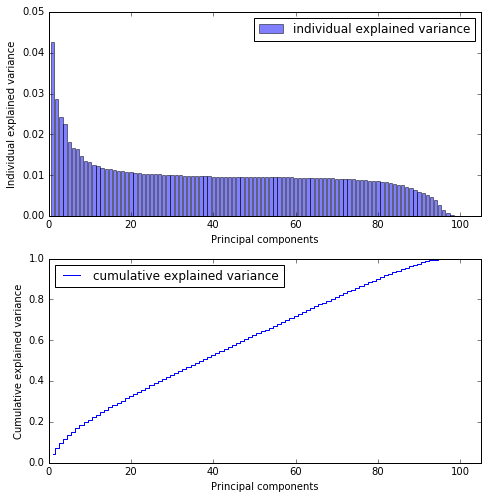

In [374]:
plt.figure(1,figsize=(7,7))
plt.subplot(211)
plt.bar(range(1, len(var_exp)+1), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='individual explained variance')
plt.xlabel('Principal components')
plt.ylabel('Individual explained variance')
plt.legend(loc='best')
plt.tight_layout()
plt.xlim([0.00, len(var_exp)])
plt.ylim([0.00, 0.05])
plt.subplot(212)
plt.step(range(1, len(var_exp)+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc='best')
plt.tight_layout()
plt.xlim([0.00, len(var_exp)])
plt.ylim([0.00, 1])
plt.show()

#### Long tail: no small number of features with lot of value
### See how the F1 score evolves with the number of retained dimensions with Logistic Regression

In [402]:
from sklearn.metrics import f1_score
pca_f1=[]
pca_comp=[]
for n in range(1,10,1):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    lr = LogisticRegression()
    lr = lr.fit(X_train_pca, y_train)
    y_pred = lr.predict(X_test_pca)
    pca_f1.append(f1_score(y_test, y_pred))
    pca_comp.append(n)
    print('F1 for %d components: %.2f' % (n,f1_score(y_test, y_pred)))

F1 for 1 components: 0.48
F1 for 2 components: 0.57
F1 for 3 components: 0.57
F1 for 4 components: 0.57
F1 for 5 components: 0.57
F1 for 6 components: 0.60
F1 for 7 components: 0.60
F1 for 8 components: 0.61
F1 for 9 components: 0.61


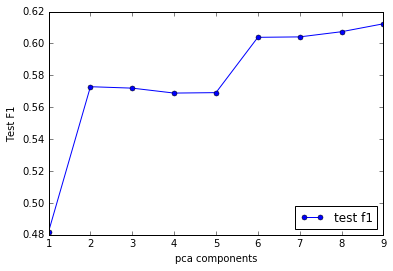

In [403]:
plt.plot(pca_comp, pca_f1, 
         color='blue', marker='o', 
         markersize=5, label='test f1')
plt.legend(loc='lower right')
plt.xlabel('pca components')
plt.ylabel('Test F1')
plt.show()

#### No advantage compared to original feature selection (see above)

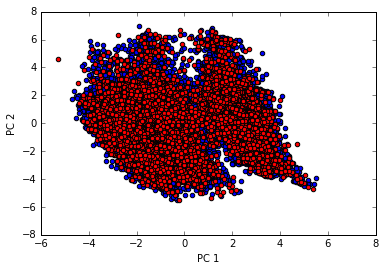

In [393]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c='b')
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c='r')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

#### No separation visible with 2 dimensions

## Decision Tree

In [398]:
X_train, X_test, y_train, y_test, columns = getDataSetCopy()

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [399]:
from sklearn.tree import export_graphviz
# export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])
export_graphviz(tree, out_file='tree.dot')
# dot -Tpng tree.dot -o tree.png

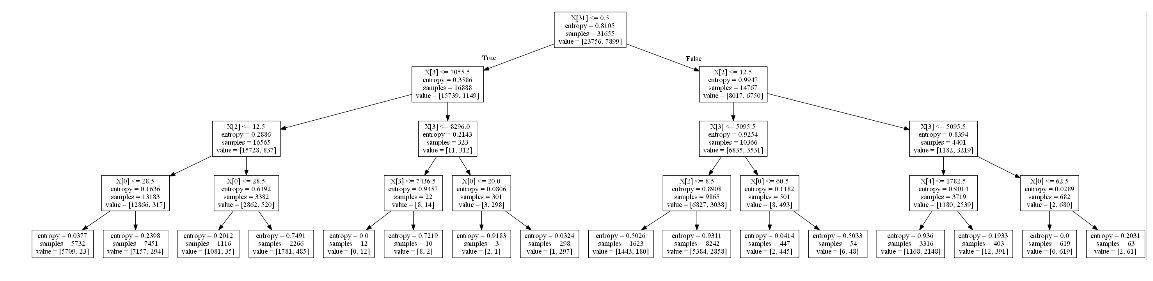

In [400]:
plt.figure(1,figsize=(20,20))
plt.subplot(111)
image = plt.imread('tree.png')
plt.imshow(image)
plt.axis('off')
plt.show()

In [401]:
y_pred = tree.predict(X_test)
f1_score(y_test, y_pred)

0.61786684782608703

## Conclusion so far: difficult to go beyond F1 = 0.66